EDA should be in the context of my data.  I should state what I expect BEFORE checking for it in the data.

Also at the top I can include links, context, goals

In [1]:
import pandas as pd
from pandas import json_normalize
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm
import yaml
import ds_utils_callum
import sys
from collections import defaultdict
from collections import Counter

Put the first policy into a df

In [2]:
with open("APP_350_v1_1/annotations/policy_1.yml", "r") as stream:
    try:
        doc_df = (json_normalize(yaml.safe_load(stream)))
    except yaml.YAMLError as exc:
        print(exc)

In [3]:
doc_df

,policy_id,policy_name,policy_type,contains_synthetic,segments
0,1,6677G,TEST,False,"[{'segment_id': 0, 'segment_text': 'PRIVACY PO..."


Put all the locations of the policy files in a list

In [4]:
full_doc_list = [f"APP_350_v1_1/annotations/policy_{num}.yml" for num in range(2,351)]
print(len(full_doc_list))
print(full_doc_list[0])
print(full_doc_list[348])

349
APP_350_v1_1/annotations/policy_2.yml
APP_350_v1_1/annotations/policy_350.yml


Loop through all the policy file addresses, normalise it and add it to the bottom of `doc_df`

In [5]:
for document in full_doc_list:
    with open(document, "r") as stream:
        try:
            current_df_policy_info = (json_normalize(yaml.safe_load(stream)))
            doc_df = pd.concat([doc_df, current_df_policy_info], axis=0)
        except yaml.YAMLError as exc:
            print(exc)

Saving the DF so that I can more quickly load it in the future:

In [6]:
# doc_df.to_csv('data/loaded_df.csv', sep ='\t')
# Not functional at the moment

In [7]:
# doc_df = pd.read_csv('data/loaded_df.csv', index_col=0, delimiter="\t")
# df.head(3)
# Add validation to ensure the data was maintained properly

This gives a basic df with basic info about the policy. The content and annotations are embedded in column "`segments`".

In [8]:
doc_df

,policy_id,policy_name,policy_type,contains_synthetic,segments
0,1,6677G,TEST,False,"[{'segment_id': 0, 'segment_text': 'PRIVACY PO..."
0,2,AIFactory,TEST,False,"[{'segment_id': 0, 'segment_text': 'AI Factory..."
0,3,AppliqatoSoftware,TEST,False,"[{'segment_id': 0, 'segment_text': 'Automatic ..."
0,4,BandaiNamco,TEST,False,"[{'segment_id': 0, 'segment_text': 'MOBILE APP..."
0,5,BarcodeScanner,TEST,False,"[{'segment_id': 0, 'segment_text': 'Skip to co..."
...,...,...,...,...,...
0,346,Yahoo,TRAINING,True,"[{'segment_id': 0, 'segment_text': '⌂Home Mail..."
0,347,YouVersion,TRAINING,True,"[{'segment_id': 0, 'segment_text': 'Videos Sig..."
0,348,Zedge,TRAINING,True,"[{'segment_id': 0, 'segment_text': 'Privacy Po..."
0,349,Zello,TRAINING,True,"[{'segment_id': 0, 'segment_text': 'Support Si..."


In [9]:
print(f"{round(sys.getsizeof(doc_df)/(1e6),4)} MB")

0.1982 MB


In [10]:
doc_df['segments'].str.len()

0     36
0     14
0      8
0     57
0     32
    ... 
0     18
0     19
0     40
0     14
0    102
Name: segments, Length: 350, dtype: int64

In [11]:
doc_df.reset_index(drop=True, inplace=True)

In [12]:
doc_df.head(3)

,policy_id,policy_name,policy_type,contains_synthetic,segments
0,1,6677G,TEST,False,"[{'segment_id': 0, 'segment_text': 'PRIVACY PO..."
1,2,AIFactory,TEST,False,"[{'segment_id': 0, 'segment_text': 'AI Factory..."
2,3,AppliqatoSoftware,TEST,False,"[{'segment_id': 0, 'segment_text': 'Automatic ..."


In [13]:
doc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   policy_id           350 non-null    int64 
 1   policy_name         350 non-null    object
 2   policy_type         350 non-null    object
 3   contains_synthetic  350 non-null    bool  
 4   segments            350 non-null    object
dtypes: bool(1), int64(1), object(3)
memory usage: 11.4+ KB


All policies were pulled through.  The data types are appropriate.  

In [14]:
# How many policies are train, test and validate?
doc_df["policy_type"].value_counts()

TRAINING      188
TEST          100
VALIDATION     62
Name: policy_type, dtype: int64

In [15]:
# How many policies contain synthetic data?
doc_df["contains_synthetic"].value_counts()

False    208
True     142
Name: contains_synthetic, dtype: int64

In [16]:
# How is the synthetic data spread throughout the Train, Test and Validate policies?
type_synthetic_dist = doc_df[["policy_type", "contains_synthetic"]].value_counts().unstack()
type_synthetic_dist# re-order somehow?

contains_synthetic,False,True
policy_type,,
TEST,100.0,NaN
TRAINING,82.0,106.0
VALIDATION,26.0,36.0


Of the data used for training, slightly more of it has synthetic information.  None of the test data has synthetic values, which makes sense because we need to train on real data.

I don't know what the Validation data is yet.

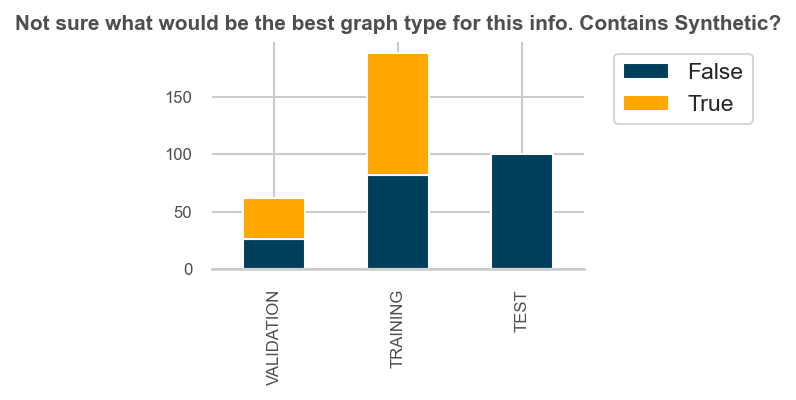

In [17]:
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (3.2, 2)
# set the font name for a font family
#     plt.rcParams.update({'font.sans-serif':'Helvetica'})
sns.set(style="whitegrid")
type_synthetic_dist.sort_values([1]).plot(kind="bar", stacked=True, color=['#003F5C', '#FFA600', '#BC5090']) #I think need more colours if more bars being added
sns.despine(left=True) #de-spine, gets rid of the boarders
plt.title("Not sure what would be the best graph type for this info. Contains Synthetic?", size=10, color='#4F4E4E', fontweight="bold") # Consistent style
plt.xlabel('')
plt.xticks(size=8, color='#4F4E4E', rotation=90)
plt.yticks(size=8, color='#4F4E4E')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

## Adding some EDA info to doc_df

In [18]:
doc_df["num_segments"] = 0
doc_df["num_annotated_segs"] = 0
doc_df["total_characters"] = 0

In [19]:
for i in range(len(doc_df["segments"])):
    segment = doc_df.loc[i, "segments"] # grab the policy
    policy_segment_df = json_normalize(segment) # normalise it
    policy_segment_df.set_index('segment_id', inplace=True)
    doc_df.loc[i, "num_segments"] = policy_segment_df["segment_text"].count() # count the sentences and add to the main df
    
    policy_segment_df.loc[ policy_segment_df["annotations"].str.len() == 0 , "annotations"] = None # clean the annotations column
    doc_df.loc[i, "num_annotated_segs"] = policy_segment_df["annotations"].count()

    doc_df.loc[i, "total_characters"] = policy_segment_df["segment_text"].str.len().sum()
    
doc_df.head(3)

,policy_id,policy_name,policy_type,contains_synthetic,segments,num_segments,num_annotated_segs,total_characters
0,1,6677G,TEST,False,"[{'segment_id': 0, 'segment_text': 'PRIVACY PO...",36,11,12703
1,2,AIFactory,TEST,False,"[{'segment_id': 0, 'segment_text': 'AI Factory...",14,5,5995
2,3,AppliqatoSoftware,TEST,False,"[{'segment_id': 0, 'segment_text': 'Automatic ...",8,1,2450


Now to make a new dataframe where each row represents a paragraph (segment).

First I will get this to work for a single policy. Then I will loop through all the policies to apply the same manipulation.

In [20]:
# 
a_segment = doc_df.loc[0,"segments"]
a_segment_df = json_normalize(a_segment) # normalise it
a_segment_df.set_index('segment_id', inplace=True)
a_segment_df.loc[0:5,:]

,segment_text,annotations,sentences
segment_id,,,
0,PRIVACY POLICY This privacy policy (hereafter ...,[],[]
1,1. ABOUT OUR PRODUCTS 1.1 Our products offer a...,[],[]
2,2. THE INFORMATION WE COLLECT The information ...,[{'practice': 'Identifier_Cookie_or_similar_Te...,"[{'sentence_text': 'IP ADDRESS, COOKIES, AND W..."
3,"2.2 In addition, we store certain information ...",[{'practice': 'Identifier_Cookie_or_similar_Te...,"[{'sentence_text': '6677g may use cookies, web..."
4,(c) to remember your preferences and registrat...,[],[]
5,(d) to present and help measure and research t...,[],[]


Getting close.  I want segment id,	segment text, and Source document id. So I just need to add Source document id, which I will have to pull from the higher-level dataframe from before "doc_df"

In [21]:
this_segment = doc_df.loc[0,"segments"]
this_segment_df = json_normalize(this_segment) # normalise it
this_segment_df.set_index('segment_id', inplace=True)
this_segment_df["source_policy_number"] = doc_df.loc[0,"policy_id"]

segment_df = this_segment_df

segment_df.head(3)

,segment_text,annotations,sentences,source_policy_number
segment_id,,,,
0,PRIVACY POLICY This privacy policy (hereafter ...,[],[],1
1,1. ABOUT OUR PRODUCTS 1.1 Our products offer a...,[],[],1
2,2. THE INFORMATION WE COLLECT The information ...,[{'practice': 'Identifier_Cookie_or_similar_Te...,"[{'sentence_text': 'IP ADDRESS, COOKIES, AND W...",1


In [22]:
for i in doc_df.index:
    this_segment = doc_df.loc[i,"segments"]
    this_segment_df = json_normalize(this_segment) # normalise it
    this_segment_df.set_index('segment_id', inplace=True)
    this_segment_df["source_policy_number"] = doc_df.loc[i,"policy_id"]
    
    segment_df = pd.concat( [segment_df, this_segment_df], axis=0 ) 


segment_df.head(3)

,segment_text,annotations,sentences,source_policy_number
segment_id,,,,
0,PRIVACY POLICY This privacy policy (hereafter ...,[],[],1
1,1. ABOUT OUR PRODUCTS 1.1 Our products offer a...,[],[],1
2,2. THE INFORMATION WE COLLECT The information ...,[{'practice': 'Identifier_Cookie_or_similar_Te...,"[{'sentence_text': 'IP ADDRESS, COOKIES, AND W...",1


In [23]:
segment_df['policy_segment_id'] = segment_df.index

In [24]:
segment_df.reset_index(drop=True, inplace=True)

In [25]:
segment_df.index.names = ['segment_id']

In [26]:
segment_df = segment_df[['source_policy_number', 'policy_segment_id', 'segment_text', 'annotations', 'sentences']]

In [27]:
segment_df

,source_policy_number,policy_segment_id,segment_text,annotations,sentences
segment_id,,,,,
0,1,0,PRIVACY POLICY This privacy policy (hereafter ...,[],[]
1,1,1,1. ABOUT OUR PRODUCTS 1.1 Our products offer a...,[],[]
2,1,2,2. THE INFORMATION WE COLLECT The information ...,[{'practice': 'Identifier_Cookie_or_similar_Te...,"[{'sentence_text': 'IP ADDRESS, COOKIES, AND W..."
3,1,3,"2.2 In addition, we store certain information ...",[{'practice': 'Identifier_Cookie_or_similar_Te...,"[{'sentence_text': '6677g may use cookies, web..."
4,1,4,(c) to remember your preferences and registrat...,[],[]
...,...,...,...,...,...
15538,350,97,"699 8th Street San Francisco, CA 94103 back to...",[],[]
15539,350,98,Facebook Twitter YouTube Instagram NaturalMoti...,[],[]
15540,350,99,©2017 Zynga Inc. All rights reserved.,[],[]


In [28]:
segment_df.shape

(15543, 5)

In [29]:
segment_df.tail(3)

,source_policy_number,policy_segment_id,segment_text,annotations,sentences
segment_id,,,,,
15540,350,99,©2017 Zynga Inc. All rights reserved.,[],[]
15541,350,100,We and the service providers acting on our beh...,[{'practice': 'Identifier_Cookie_or_similar_Te...,[{'sentence_text': 'We and the service provide...
15542,350,101,"For example, Zynga does not collect your e-mai...",[{'practice': 'Contact_E_Mail_Address_1stParty...,"[{'sentence_text': 'For example, Zynga does no..."


In [30]:
segment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15543 entries, 0 to 15542
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   source_policy_number  15543 non-null  int64 
 1   policy_segment_id     15543 non-null  int64 
 2   segment_text          15543 non-null  object
 3   annotations           15543 non-null  object
 4   sentences             15543 non-null  object
dtypes: int64(2), object(3)
memory usage: 607.3+ KB


## Demo EDA

In [31]:
lists_of_words = segment_df['segment_text'].str.split(' ')

In [32]:
lists_of_words.str.len()

segment_id
0        102
1         85
2         89
3         75
4         10
        ... 
15538     11
15539      9
15540      6
15541     33
15542     19
Name: segment_text, Length: 15543, dtype: int64

---

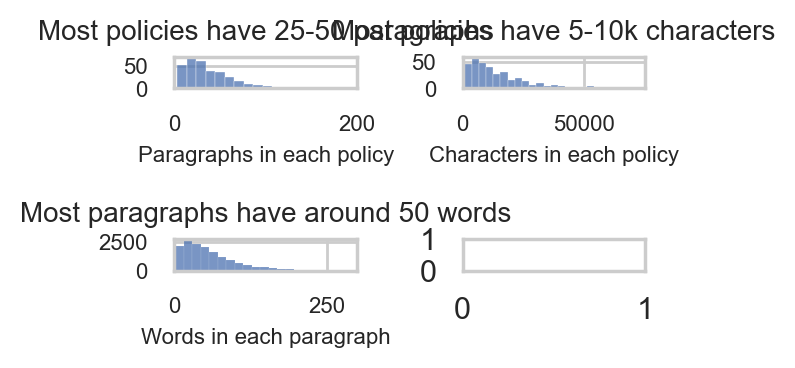

In [33]:
plt.subplots(2, 2, dpi=200)

plt.subplot(2, 2, 1)
sns.histplot(data=doc_df["num_segments"])
plt.xlim(0,200)
plt.xticks(fontsize=8)
plt.xlabel("Paragraphs in each policy", fontsize=8)
plt.ylabel("")
plt.yticks(fontsize=8)
plt.title("Most policies have 25-50 paragraphs", fontsize=10)

plt.subplot(2, 2, 2)
sns.histplot(data=doc_df["total_characters"], bins=70)
plt.title("Most policies have 5-10k characters", fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlim(0,75000)
plt.ylabel("")
plt.xlabel("Characters in each policy", fontsize=8)

plt.subplot(2, 2, 3)
sns.histplot( lists_of_words.str.len(), bins = 200 )
plt.xlim(0, 300)
plt.title("Most paragraphs have around 50 words", fontsize=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel("")
plt.xlabel("Words in each paragraph", fontsize=8)

plt.tight_layout()
plt.show()

In [34]:
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

In [35]:
# Create corpus
corpus=[]
lists_of_words2 = lists_of_words.values.tolist() # list of words
# converts the series into an array and then into a list of lists
corpus = [word for i in lists_of_words2 for word in i] # add every individual word to the corpus 
# somehow going two layers into the list of lists with some kind of double list comprehension


In [36]:
corpus_lower = [word.lower() for word in corpus]

In [37]:
len(corpus_lower)

936272

In [38]:
dic = defaultdict(int)
for word in corpus_lower:
    if word in stop:
        dic[word] += 1 

In [39]:
# Plot top stopwords

top = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
each_stopword, stopword_count = zip(*top) # *top expands the list of top 10 tuples

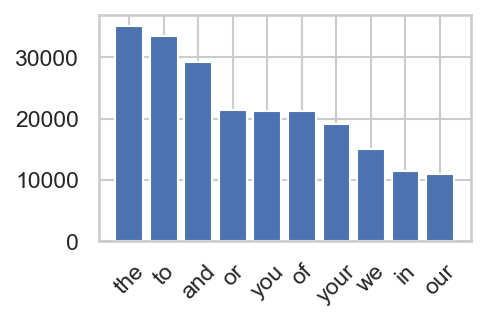

In [40]:
plt.figure()
plt.bar(each_stopword, stopword_count)
plt.xticks(rotation=45)
plt.show()

In [41]:
counter = Counter(corpus_lower) # makes a dictionary with all the words and total occurrences
most = counter.most_common() # ordered by most common words

x, y = [], []
for word, count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

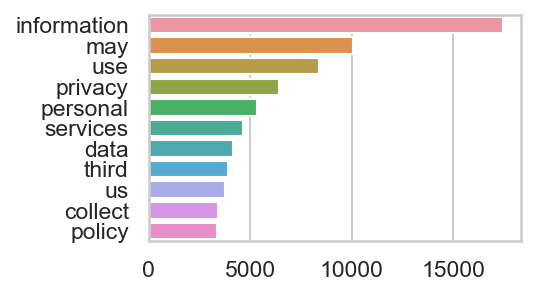

In [42]:
sns.barplot(x=y, y=x)
plt.show()

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [82]:
def get_top_ngram(corpus, n=None, top_n=10):
    vec = CountVectorizer(ngram_range = (n, n)).fit(corpus) # set up the CountVectorizer w.r.t. n
    
    bag_of_words = vec.transform(corpus) # sparse matrix of headlines & n-grams
    
    sum_words = bag_of_words.sum( axis = 0 ) # for each n-gram, sum of rows it appears in(?)
    
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()] 
    # vocabulary_.items() is a dict of bigram : feature index
    # sum_words is in the same order so we can use vocabulary_.items() index
    # to access the sum_words object and grab the total occurrences
    # Thus words_freq lists each word and the total occurrences
    
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True) # sorting by frequency
    return words_freq[:top_n]

In [83]:
top_n_bigrams = get_top_ngram(segment_df['segment_text'], 5, top_n=15)
x, y = map(list, zip(*top_n_bigrams)) # Re-arranging. 
# The * expands top_n_bigrams so that each bigram, freq tuple is passed as argument to zip
# Then zip will take the bigram from each and group them together, and the freq from each and group them together
# Then map applies the list function to both groups to make them both lists which can be passed to x and y


In [84]:
top_n_bigrams

[('including but not limited to', 303),
 ('if you have any questions', 209),
 ('under the age of 13', 194),
 ('we are not responsible for', 149),
 ('described in this privacy policy', 138),
 ('changes to this privacy policy', 137),
 ('in accordance with this privacy', 130),
 ('the services or the site', 127),
 ('children under the age of', 124),
 ('may not be able to', 123),
 ('application the services or the', 122),
 ('accordance with this privacy policy', 121),
 ('if you do not agree', 116),
 ('we reserve the right to', 104),
 ('are not responsible for the', 100)]

In [1]:
plt.figure(figsize=(6,4), dpi=400)
sns.barplot(x=y,y=x)
plt.yticks(fontsize=9)
plt.xlabel("Occurrence across 350 privacy policies", fontsize=8)
plt.xticks(fontsize=7)
plt.title("Top 15 penta-grams")
plt.show()

NameError: name 'plt' is not defined

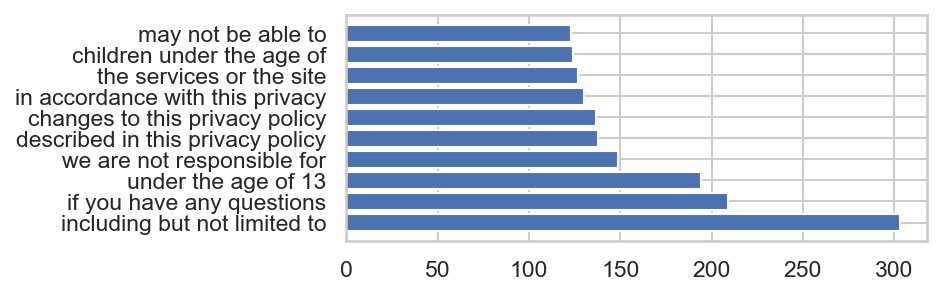

In [73]:
plt.figure(figsize=(5,2))
plt.barh(width=y, y=x,)
plt.show()

<AxesSubplot:>

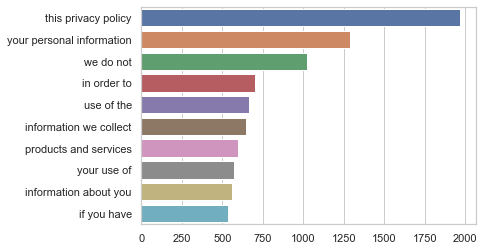

In [172]:
top_tri_grams=get_top_ngram(segment_df['segment_text'],n=3)
x,y=map(list,zip(*top_tri_grams))
sns.barplot(x=y,y=x)

In [173]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [176]:
tfidf = TfidfVectorizer(min_df=5)

tfidf.fit(segment_df['segment_text'])

X_transformed = tfidf.transform(segment_df['segment_text'])

/Users/chinchcliffe/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


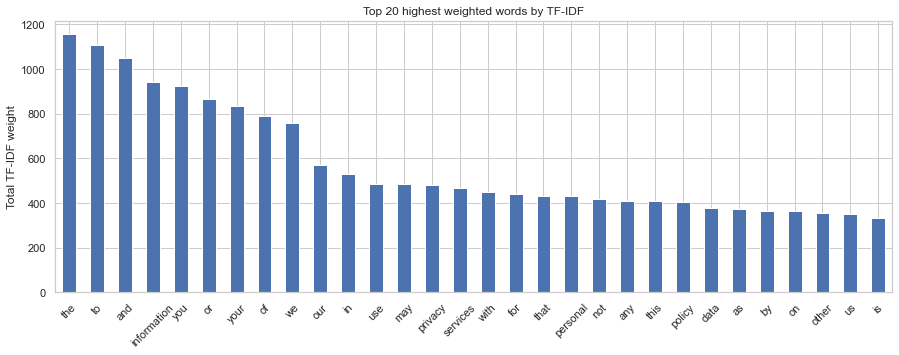

In [178]:
word_counts = pd.DataFrame(
    {"counts": X_transformed.toarray().sum(axis=0)},
    index=tfidf.get_feature_names()
).sort_values("counts", ascending=False)

word_counts.head(30).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 highest weighted words by TF-IDF")
plt.ylabel("Total TF-IDF weight")
plt.xticks(rotation=45)
plt.show()

# Wordcloud

In [114]:
from wordcloud import WordCloud, STOPWORDS

In [115]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1 
        )
    
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

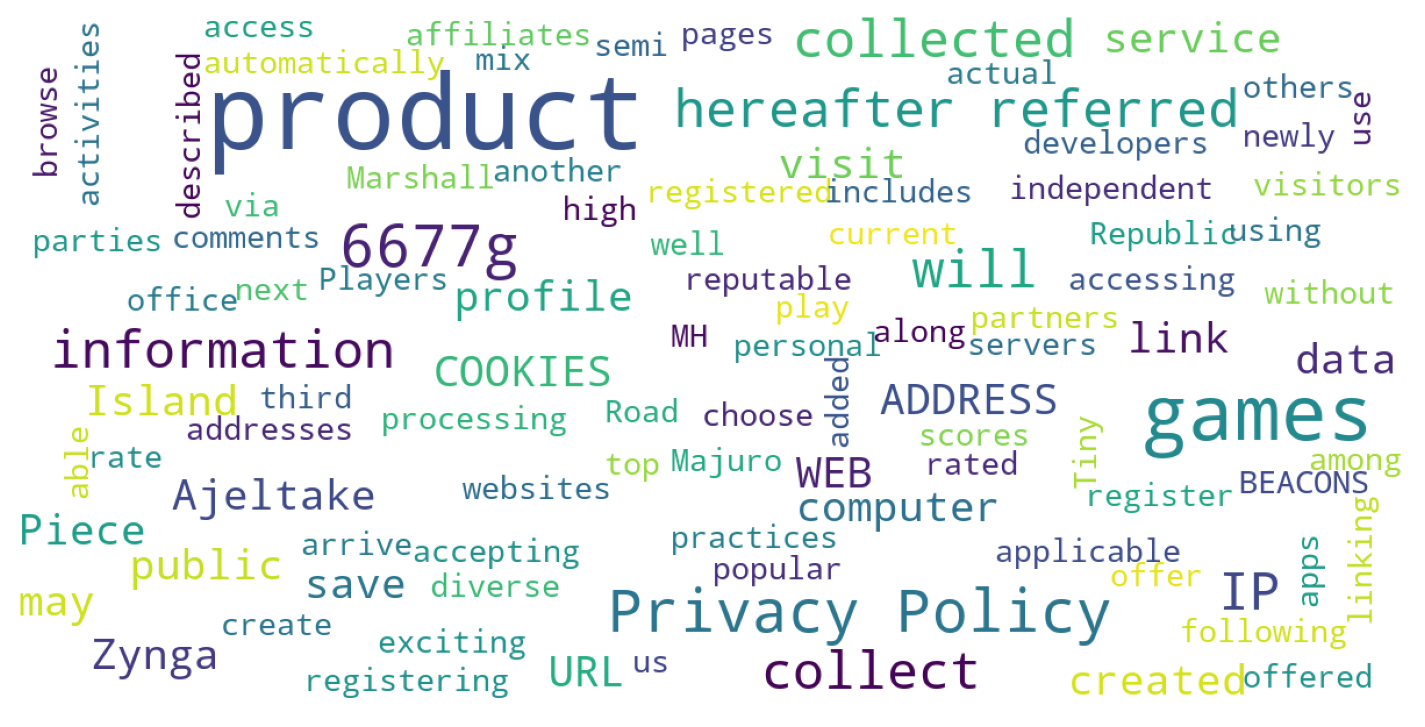

In [117]:
show_wordcloud(segment_df['segment_text'].values)